# Compare openfast turbine

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

%matplotlib inline

import postproamrwindsample_xarray as ppsample
import postproengine as ppeng
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load

from functools import partial

In [3]:
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, g)
    return outstr

In [4]:
floatingdir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/floating/MedWS_LowTI/oneturb_4x2/MedWS_LowTI_Jonswap_baseline'
fixeddir='/lustre/orion/cfd162/world-shared/lcheung/AdvancedControlsWakes/Runs/MedWS_LowTI.Frontier/oneturb_4x2/Baseline/MedWS_LowTI_4kmx2km_5m/'

In [15]:
yamlstring="""
globalattributes:
  verbose: False
  udfmodules: []
  executeorder:
  #- openfast
  #- instantaneousplanes
  - plotcsv

#trange: &trange [65, 125]
  
openfast:
# For fixed case
- name: FixedT0
  filename: FIXEDDIR/T0_OpenFAST3p5_IEA15MW/IEA-15-240-RWT-Monopile/IEA-15-240-RWT-Monopile.out
  vars:
  - Time
  - GenPwr
  - RotThrust
  output_dir: ABL_OpenFAST_Fixed
  csv:  # Store information to CSV files
    individual_files: False

# For floating case
- name: FloatingT0
  filename: FLOATDIR/T0_OpenFAST3p5_Floating_IEA15MW/IEA-15-240-RWT-UMaineSemi/IEA-15-240-RWT-UMaineSemi.out
  vars:
  - Time
  - GenPwr
  - RotThrust
  - Wave1Elev
  - PtfmSurge
  - PtfmHeave
  - PtfmSway
  - PtfmPitch
  - PtfmYaw
  output_dir: ABL_OpenFAST_Float
  csv:  # Store information to CSV files
    individual_files: False

plotcsv:
  - name: plotPower
    xlabel: 'Time [s]'
    ylabel: 'Power [kW]'
    title: 'Turbine power'
    figsize: [10,4]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'ABL_OpenFAST_Fixed/FixedT0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'Fixed'}}
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Floating'}}
  - name: plotThrust
    xlabel: 'Time [s]'
    ylabel: 'Thrust [kN]'
    title: 'Turbine thrust'
    figsize: [10,4]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'ABL_OpenFAST_Fixed/FixedT0.csv', 'xcol':'Time', 'ycol':'RotThrust', 'lineopts':{'color':'r', 'lw':1, 'linestyle':'-', 'label':'Fixed'}}
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'RotThrust', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Floating'}}

  - name: plotSuu
    xlabel: 'Time [s]'
    ylabel: 'Pitch/Yaw [deg]'
    title: 'Platform Pitch & Yaw'
    figsize: [10,4]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'PtfmPitch', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'--', 'label':'Floating Platform Pitch'}}    
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'PtfmYaw', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'Floating Platform Yaw'}}    

  - name: plotSuu
    xlabel: 'Time [s]'
    ylabel: 'Displacement [m]'
    #xscale: log
    #yscale: log
    title: 'Floating motions'
    figsize: [10,4]
    legendopts: {'loc':'upper right'}
    #postplotfunc: spectrapoints.formatplot
    csvfiles:
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'Wave1Elev', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'-', 'label':'Wave elevation'}}
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'PtfmHeave', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'--', 'label':'Platform Heave'}}
    - {'file':'ABL_OpenFAST_Float/FloatingT0.csv', 'xcol':'Time', 'ycol':'PtfmSway', 'lineopts':{'color':'b', 'lw':1,  'linestyle':'-', 'label':'Platform Sway'}}
"""
f = io.StringIO(stringReplaceDict(yamlstring, {'FIXEDDIR':fixeddir,'FLOATDIR':floatingdir}))
yamldict = Loader(f, **loaderkwargs)

Initialized plotcsv
Running plotcsv


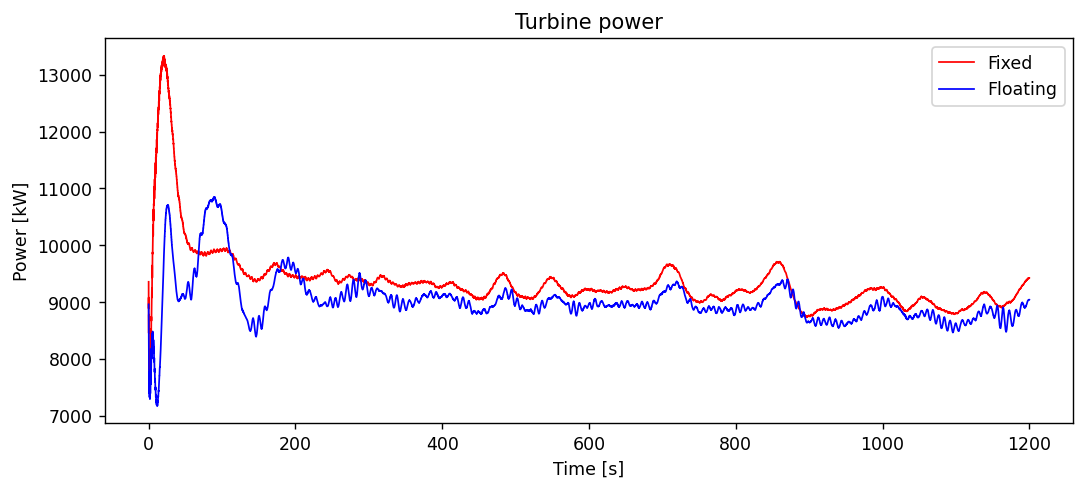

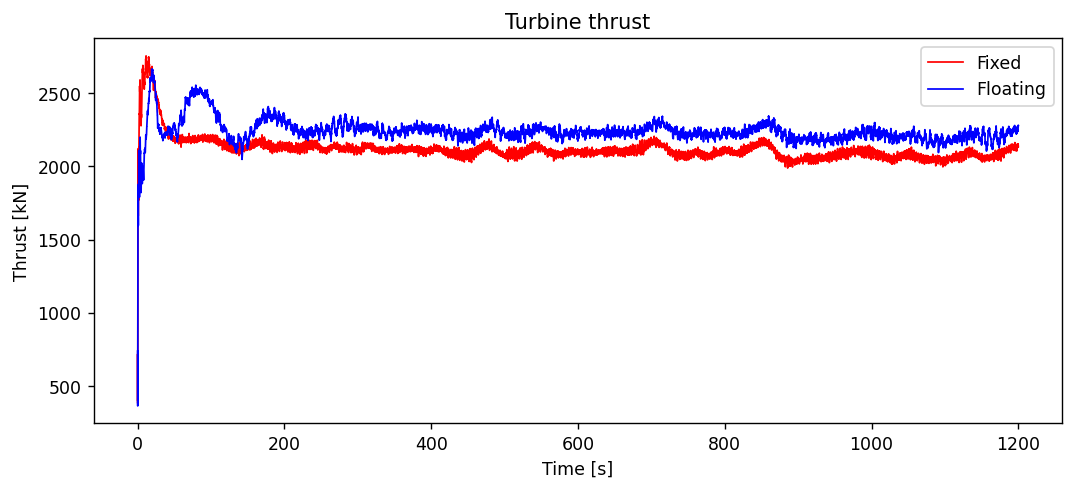

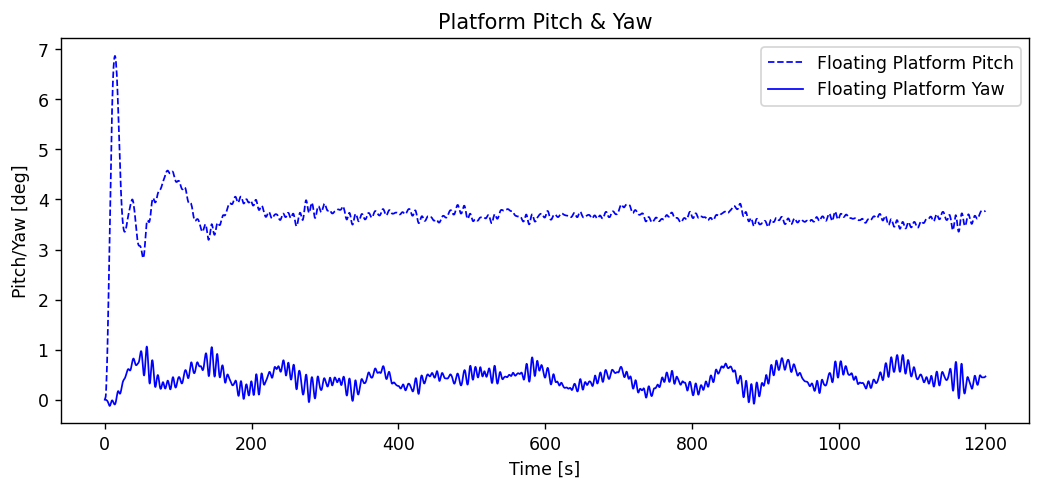

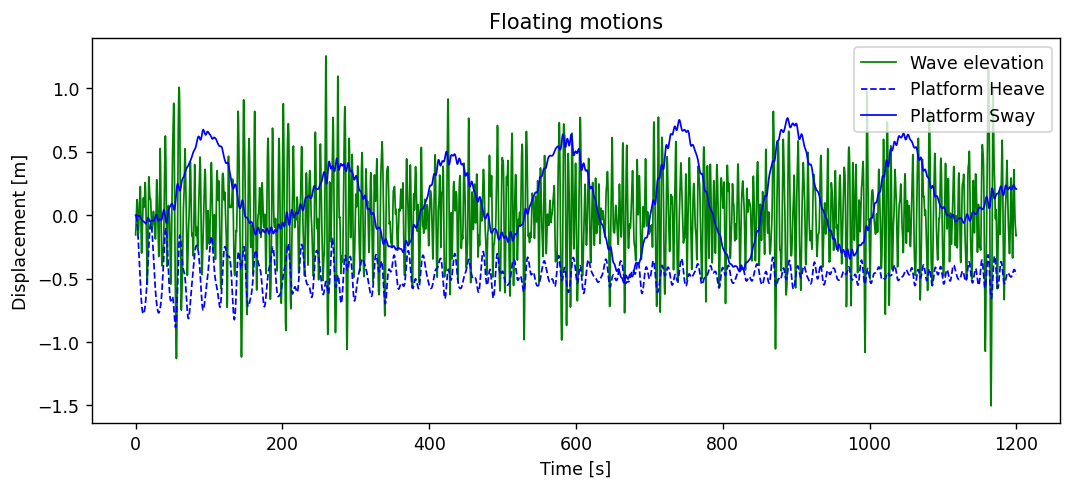

In [16]:
ppeng.driver(yamldict, verbose=True)